In [27]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [28]:
# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
#Logistic Regression is only applicable to binary classification problems. 
#Thus, the data points are composed of two classes.

In [29]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

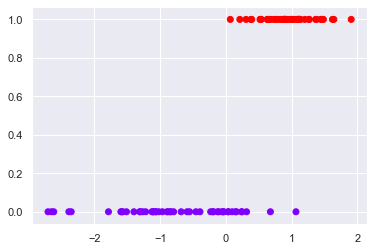

In [30]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow')

In [31]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [32]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[2.77242301]]
[-0.75120694]


In [34]:
# Let’s see how the model performs against data that it hasn’t been trained on.

In [35]:
y_pred = lr.predict(x_test)

In [36]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)


array([[10,  0],
       [ 1, 14]])

In [37]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.88238171, 0.11761829],
       [0.07039994, 0.92960006],
       [0.06003377, 0.93996623],
       [0.97578701, 0.02421299],
       [0.15881399, 0.84118601],
       [0.52185653, 0.47814347],
       [0.26718707, 0.73281293],
       [0.99418631, 0.00581369],
       [0.04585249, 0.95414751],
       [0.24302369, 0.75697631],
       [0.11037714, 0.88962286],
       [0.62016315, 0.37983685],
       [0.5407517 , 0.4592483 ],
       [0.21945572, 0.78054428],
       [0.27084825, 0.72915175],
       [0.20616933, 0.79383067],
       [0.02182611, 0.97817389],
       [0.02312028, 0.97687972],
       [0.95053549, 0.04946451],
       [0.99292695, 0.00707305],
       [0.91592627, 0.08407373],
       [0.78155474, 0.21844526],
       [0.1492227 , 0.8507773 ],
       [0.08757285, 0.91242715],
       [0.99395103, 0.00604897]])

In [38]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

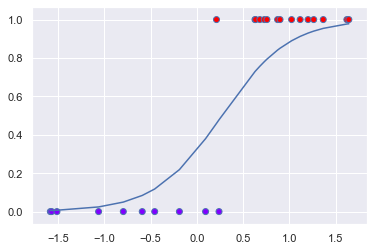

In [39]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

In [40]:
![title]('pic.png')

/bin/sh: -c: line 0: syntax error near unexpected token `'pic.png''
/bin/sh: -c: line 0: `[title]('pic.png')'
